In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Import necessary scripts
from scripts.data_quality_checks import (
    load_dataset, handle_anomalies
)

In [2]:
# Load the datasets
df_sierraleone = load_dataset('data/sierraleone-bumbuna.csv')

In [3]:
# Handle anomalies in the dataset
handle_anomalies(
    df_sierraleone,
    negative_value_columns=['GHI', 'DNI', 'DHI'],
    outlier_columns=['ModA', 'ModB', 'WS', 'WSgust'],
    lower_percentile=0.05,
    upper_percentile=0.95
)


Missing Values in Each Column:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [4]:
# Convert the Timestamp column to datetime
df_sierraleone['Timestamp'] = pd.to_datetime(df_sierraleone['Timestamp'])

# Set the Timestamp as the index
df_sierraleone.set_index('Timestamp', inplace=True)

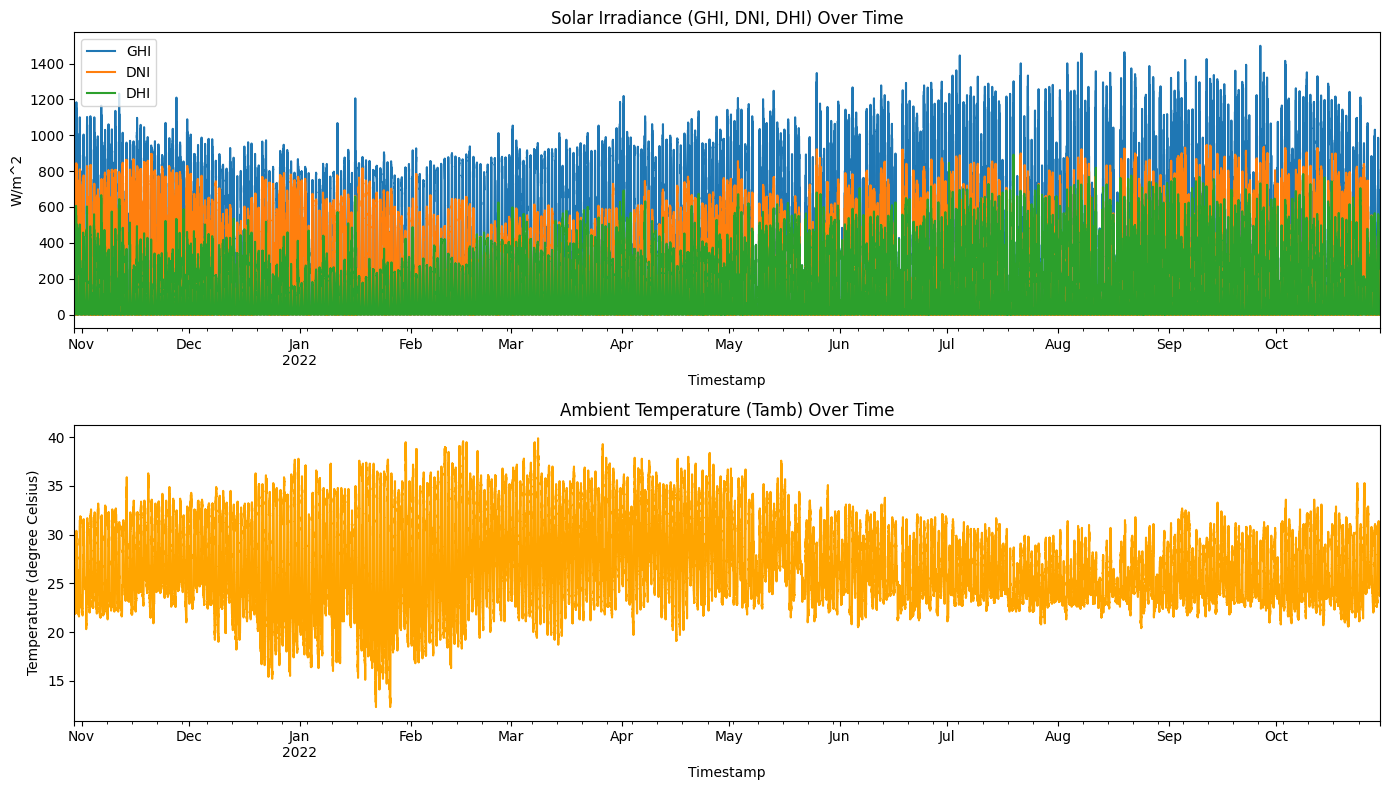

In [5]:
# Plotting GHI, DNI, DHI over time
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
df_sierraleone[['GHI', 'DNI', 'DHI']].plot(ax=plt.gca(), title='Solar Irradiance (GHI, DNI, DHI) Over Time')
plt.ylabel('W/m^2')

plt.subplot(2, 1, 2)
df_sierraleone['Tamb'].plot(ax=plt.gca(), color='orange', title='Ambient Temperature (Tamb) Over Time')
plt.ylabel('Temperature (degree Celsius)')

plt.tight_layout()
plt.show()

### Evaluating the Impact of Cleaning on Sensor Readings (ModA, ModB)

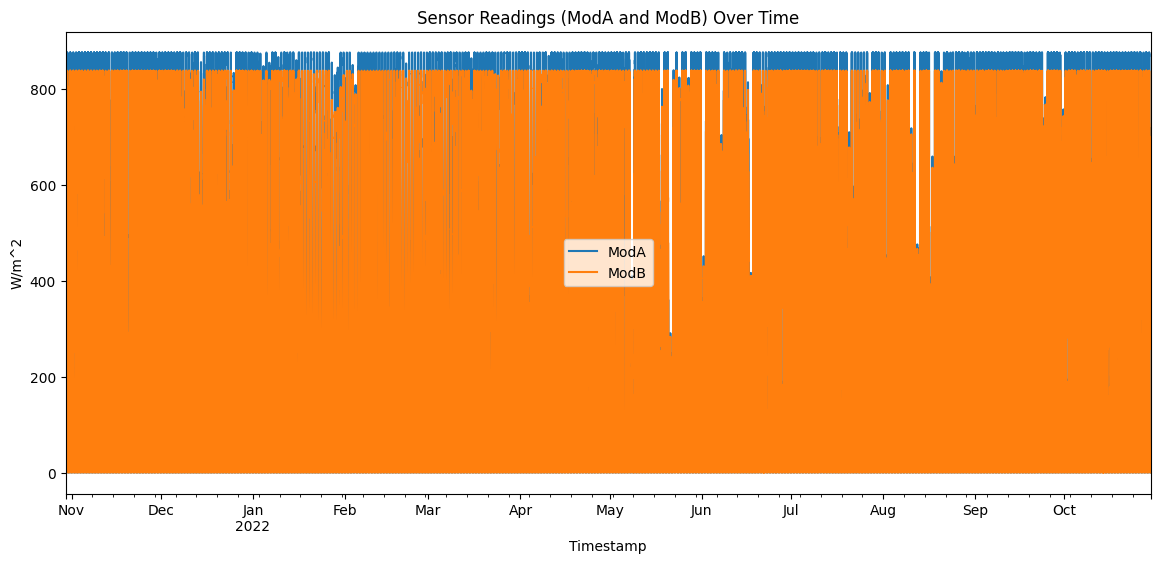

In [6]:
# Plot ModA and ModB over time
plt.figure(figsize=(14, 6))

df_sierraleone[['ModA', 'ModB']].plot(ax=plt.gca(), title='Sensor Readings (ModA and ModB) Over Time')
plt.ylabel('W/m^2')
plt.show()

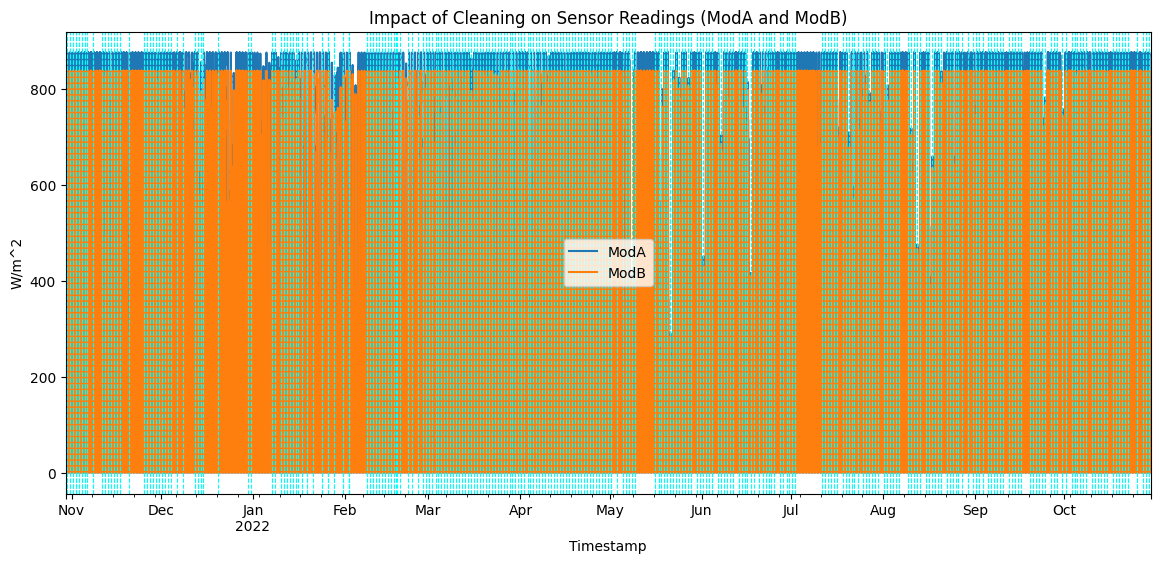

In [7]:
# Plot ModA and ModB with Cleaning events marked
plt.figure(figsize=(14, 6))

df_sierraleone[['ModA', 'ModB']].plot(ax=plt.gca(), title='Impact of Cleaning on Sensor Readings (ModA and ModB)')
plt.ylabel('W/m^2')

# Mark cleaning events
cleaning_times = df_sierraleone[df_sierraleone['Cleaning'] == 1].index
for cleaning_time in cleaning_times:
    plt.axvline(x=cleaning_time, color='cyan', linestyle='--', linewidth=0.8)

plt.show()

## Key Findings from Time Series Analysis and Cleaning Impact - Sierra Leone Dataset

### 1. **Solar Irradiance (GHI, DNI, DHI) and Temperature (Tamb) Over Time**
- **Seasonal Trends:** Similar to the Benin dataset, the Sierra Leone dataset shows clear seasonal variations in solar irradiance (GHI, DNI, DHI) and ambient temperature (Tamb). The values peak during warmer months and decrease during cooler periods, reflecting the seasonal climate patterns in Sierra Leone.
- **Stable Patterns:** The solar irradiance and temperature data do not exhibit any significant anomalies or outliers, suggesting stable environmental conditions throughout the year.

### 2. **Sensor Readings (ModA and ModB) Over Time**
- **ModA Fluctuations:** ModA readings show more frequent and significant drops compared to ModB, particularly during certain periods (e.g., January to February and May to August). These drops may be due to environmental factors such as soiling or sensor positioning.
- **ModB Stability:** ModB readings remain consistently higher and more stable than ModA, indicating that ModB may be less affected by environmental factors or is positioned more optimally.

### 3. **Impact of Cleaning on Sensor Readings**
- **Positive Impact on ModA:** The cleaning events have a noticeable positive impact on ModA readings. After cleaning, there is a marked recovery in sensor performance, suggesting that cleaning effectively removes soiling or other obstructions that affect ModA.
- **ModB Resilience:** While ModB also benefits from cleaning, its performance is generally more resilient, with fewer fluctuations even before cleaning events. This suggests that ModB might be less sensitive to the factors that impact ModA.
- **Regular Maintenance:** The regular cleaning schedule helps maintain sensor accuracy, especially for ModA, which is more prone to fluctuations. This indicates the importance of proactive maintenance in ensuring reliable sensor performance.

### 4. **Overall Observations**
- **Consistent Maintenance Strategy:** The regular and frequent cleaning events contribute to maintaining stable and accurate sensor readings, particularly for ModA. This highlights the effectiveness of the maintenance strategy in managing sensor performance in potentially challenging environmental conditions.
- **Seasonal Cleaning Adjustments:** There may be a need to adjust the frequency of cleaning during certain seasons (e.g., rainy season) to further enhance sensor reliability, as fluctuations seem more pronounced during these periods.